In [1]:
import time
import multiprocessing as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

from nfl_pickem import Pickem

In [2]:
pk = Pickem()
print(pk.file_path)
pk.pull_data()
df = pk.build_schedule()

../nfl-pickem/data/nfl_games.csv
Data successfully pulled!
Seasons 1920-2017: 16007 Games


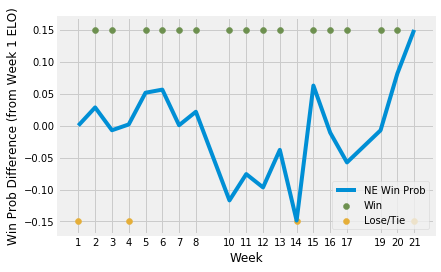

In [3]:
team = 'NE'
cond = df.team == team
plt.plot(df[cond].week.values,
         df[cond].win_prob.values - df[cond].elo_prob1.values,
         label=team+' Win Prob')
plt.scatter(df[cond&(df.result1 > 0.9)].week.values,
            0.3*df[cond&(df.result1 > 0.9)].result1.values - 0.15,
            label='Win', c='C3')
plt.scatter(df[cond&(df.result1 < 0.9)].week.values,
            0.3*df[cond&(df.result1 < 0.9)].result1.values - 0.15,
            label='Lose/Tie', c='C2')
plt.ylabel('Win Prob Difference (from Week 1 ELO)')
plt.xlabel('Week')
plt.xticks(df[cond].week.values,
           df[cond].week.values)
plt.legend(loc='lower right')
plt.show()

## Historical Validation

In [4]:
df = pd.read_csv('results/strategy_analysis.csv')
print(df.shape)

(357, 5)


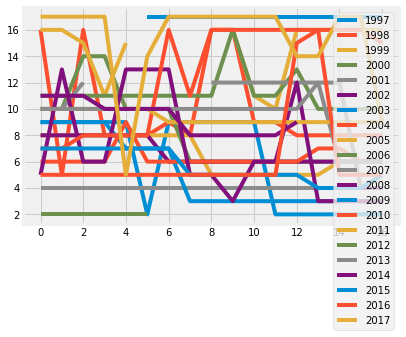

In [5]:
df = df.sort_values(by=['season', 'max_week'])
for season in df.season.unique():
    cond = df.season == season
    plt.plot(df[cond].max_week.values,
             df[cond].elim_week.values,
             label=season)
plt.legend()
plt.show()